In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

X_train = pd.read_csv('/content/train.csv')
train_len=len(X_train)

X_test = pd.read_csv('/content/test.csv')

raw_data=pd.concat([X_train, X_test])
raw_data.reset_index(inplace=True, drop=True)
raw_data.head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0


In [2]:
raw=raw_data.copy()

In [3]:
#출근인원수
raw_data['출근인원']=raw_data['본사정원수']-(raw_data['본사휴가자수']+raw_data['본사출장자수']+raw_data['현본사소속재택근무자수']).astype(int)
raw_data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근인원
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142


In [4]:
#요일 라벨인코딩
from sklearn.preprocessing import LabelEncoder 

week_labels = raw_data['요일'].unique()
week_labels

encoder = LabelEncoder() 
encoder.fit(week_labels)

raw_data['week_enc']=encoder.transform(raw_data['요일'])

In [5]:
no_dinner_idx=raw_data[raw_data['석식계']==0]['석식메뉴'].index
raw_data['no_dinner']=[0]*len(raw_data)

In [6]:
def lunch_list_make(raw_data, j, Menu='중식메뉴'):
  arr = []
  for word in raw_data[Menu][j].strip().split(" "):
    if word=="":
      continue
    elif word[0]!="(":
      arr.append(word)
    if len(arr)==3:
      break
  return " ".join(arr)

def dinner_list_make(raw_data, j, Menu='석식메뉴'):
  arr = []
  if j in no_dinner_idx:
    raw_data['no_dinner'][j]=1
    return "None"
  else: 
    for word in raw_data[Menu][j].strip().split(" "):
      if word=="":
        continue
      elif word[0]!="(":
        arr.append(word)
      if len(arr)==3:
        break
    return " ".join(arr)

In [7]:
for j in range(raw_data.shape[0]):
  #raw_data['조식메뉴'][j] = food_list_make(raw_data, j, "조식메뉴")
  raw_data['중식메뉴'][j] = lunch_list_make(raw_data, j, "중식메뉴")
  raw_data['석식메뉴'][j] = dinner_list_make(raw_data, j, "석식메뉴")
  j+=1

In [8]:
raw_data['일자']=pd.to_datetime(raw_data['일자'])
raw_data['month']=raw_data['일자'].dt.strftime('%m')
raw_data['date']=raw_data['일자'].dt.strftime('%m%d')

In [9]:
drop_i=raw_data[(raw_data['석식계']!=0) & (raw_data['석식메뉴']=="*")].index
raw_data.drop(drop_i, inplace=True)
raw_data.reset_index(inplace=True, drop=True)

In [10]:
raw_data

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근인원,week_enc,no_dinner,month,date
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기,쌀밥/잡곡밥 육개장 자반고등어구이,1039.0,331.0,2401,3,0,02,0201
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김,콩나물밥*양념장 어묵국 유산슬,867.0,560.0,2378,4,0,02,0202
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거,쌀밥/잡곡밥 청국장찌개 황태양념구이,1017.0,573.0,2365,2,0,02,0203
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음,미니김밥*겨자장 우동 멕시칸샐러드,978.0,525.0,2277,1,0,02,0204
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정,쌀밥/잡곡밥 차돌박이찌개 닭갈비,925.0,330.0,2142,0,0,02,0205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2021-04-05,월,2973,125,174,704,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비,흑미밥 돈육고추장찌개 갈치구이,NaN,NaN,2343,3,0,04,0405
1250,2021-04-06,화,2973,76,170,636,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜,추가밥 짬뽕*생면 수제찹쌀꿔바로우,NaN,NaN,2363,4,0,04,0406
1251,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기,단호박카레라이스 시금치된장국 소떡소떡,NaN,NaN,2329,2,0,04,0407
1252,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 가자미구이*장,흑미밥 어묵매운탕 쇠고기숙주볶음,NaN,NaN,2306,1,0,04,0408


In [11]:
train_len=len(raw_data[raw_data['중식계']>=0])
raw_data[train_len:train_len+5]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근인원,week_enc,no_dinner,month,date
1204,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜,흑미밥 얼큰순두부찌개 쇠고기우엉볶음,NaN,NaN,2355,2,0,01,0127
1205,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭,충무김밥 우동국물 오징어무침,NaN,NaN,2319,1,0,01,0128
1206,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스,흑미밥 물만둣국 카레찜닭,NaN,NaN,2170,0,0,01,0129
1207,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기,흑미밥 동태탕 돈육꽈리고추장조림,NaN,NaN,2340,3,0,02,0201
1208,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림,흑미밥 바지락살국 쇠고기청경채볶음,NaN,NaN,2362,4,0,02,0202


##**EDA**

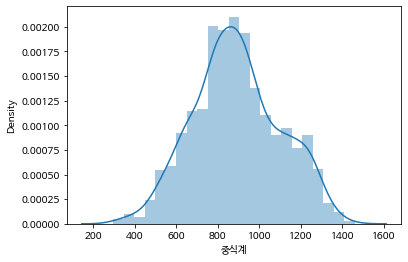

In [ ]:
sns.distplot(raw_data['중식계'])

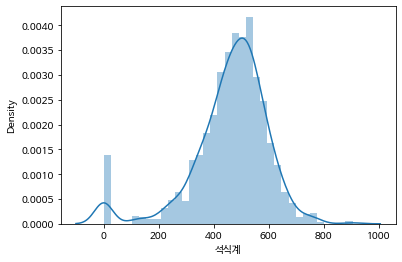

In [ ]:
sns.distplot(raw_data['석식계'])

석식은 먹지 않는 사람이 많아서 0이 크게 튄다는 특징

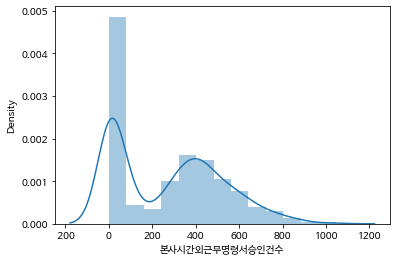

In [ ]:
sns.distplot(raw_data['본사시간외근무명령서승인건수'])

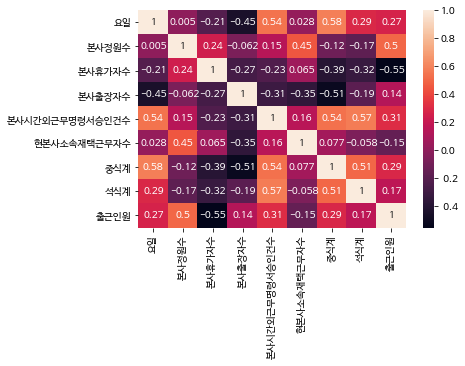

In [ ]:
sns.heatmap(raw_data.drop(['일자','조식메뉴','중식메뉴','석식메뉴'],axis=1).corr(), annot=True)

중식계: 요일, 시간외근무자수, 석식계

석식계: 시간외 근무자수, 중식계

<function matplotlib.pyplot.show>

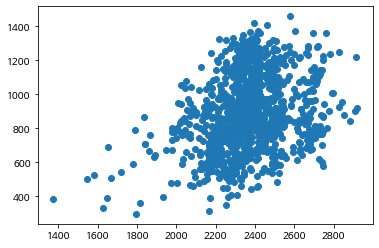

In [ ]:
#출근 인원과 중식계의 관계
plt.scatter(raw_data['출근인원'],raw_data['중식계'])
plt.show

<function matplotlib.pyplot.show>

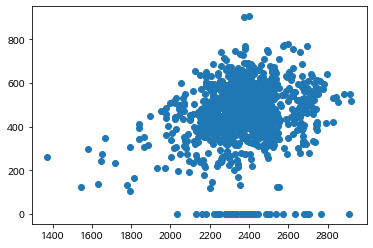

In [ ]:
#출근 인원과 석식계의 관계
plt.scatter(raw_data['출근인원'],raw_data['석식계'])
plt.show

<function matplotlib.pyplot.show>

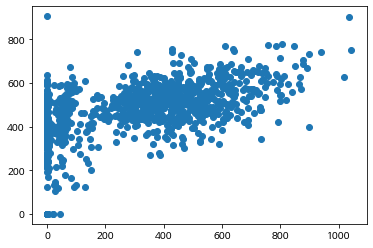

In [ ]:
#시간외 근무자와 석식계의 관계
plt.scatter(raw_data['본사시간외근무명령서승인건수'],raw_data['석식계'])
plt.show

시간외 근무자가 늘어난다고 석식계가 꼭 늘어나는 것은 아니지만, 석식계가 0인 날은 시간외 근무자가 적을 때에 몰려있음.

시간외 근무자가 적다 -> 석식계가 0이다 (x)

석식계가 0이다 -> 시간외 근무자가 적다 (o)

In [ ]:
raw_data[raw_data['석식계']==0].count()[0]/raw_data[raw_data['본사시간외근무명령서승인건수']<=100].count()[0]*100

8.829568788501026

그러나 시간외 근무자가 적을 때 석식계가 0인 비율이 그렇게 크지는 않다.

#**중식계 예측**

##**training_text**

In [12]:
X_train1=raw_data[['요일','중식메뉴','석식메뉴']]
y_train_text=raw_data['중식계']

In [13]:
X_train1

,요일,중식메뉴,석식메뉴
0,월,쌀밥/잡곡밥 오징어찌개 쇠불고기,쌀밥/잡곡밥 육개장 자반고등어구이
1,화,쌀밥/잡곡밥 김치찌개 가자미튀김,콩나물밥*양념장 어묵국 유산슬
2,수,카레덮밥 팽이장국 치킨핑거,쌀밥/잡곡밥 청국장찌개 황태양념구이
3,목,쌀밥/잡곡밥 쇠고기무국 주꾸미볶음,미니김밥*겨자장 우동 멕시칸샐러드
4,금,쌀밥/잡곡밥 떡국 돈육씨앗강정,쌀밥/잡곡밥 차돌박이찌개 닭갈비
...,...,...,...
1249,월,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비,흑미밥 돈육고추장찌개 갈치구이
1250,화,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜,추가밥 짬뽕*생면 수제찹쌀꿔바로우
1251,수,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기,단호박카레라이스 시금치된장국 소떡소떡
1252,목,쌀밥/옥수수밥/찰현미밥 맑은떡국 가자미구이*장,흑미밥 어묵매운탕 쇠고기숙주볶음


In [14]:
X_train1[X_train1['석식메뉴']=="None"].shape

(43, 3)

In [15]:
def menu_cutting(time):
  m1, m2, m3=[], [], []
  for i in range(len(X_train1)):
    if X_train1.iloc[i][time]=="None":
      m1.append("None")
      m2.append("None")
      m3.append("None")
    else:
      menu_l=X_train1.iloc[i][time].split(" ")
      #print(menu_l)
      m1.append(menu_l[0])
      m2.append(menu_l[1])
      m3.append(menu_l[2])
  X_train1[time+'_rice']=m1
  X_train1[time+'_soup']=m2
  X_train1[time+'_main']=m3

In [16]:
menu_cutting('중식메뉴')
menu_cutting('석식메뉴')

In [17]:
X_train1

,요일,중식메뉴,석식메뉴,중식메뉴_rice,중식메뉴_soup,중식메뉴_main,석식메뉴_rice,석식메뉴_soup,석식메뉴_main
0,월,쌀밥/잡곡밥 오징어찌개 쇠불고기,쌀밥/잡곡밥 육개장 자반고등어구이,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,화,쌀밥/잡곡밥 김치찌개 가자미튀김,콩나물밥*양념장 어묵국 유산슬,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,수,카레덮밥 팽이장국 치킨핑거,쌀밥/잡곡밥 청국장찌개 황태양념구이,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,목,쌀밥/잡곡밥 쇠고기무국 주꾸미볶음,미니김밥*겨자장 우동 멕시칸샐러드,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,금,쌀밥/잡곡밥 떡국 돈육씨앗강정,쌀밥/잡곡밥 차돌박이찌개 닭갈비,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비
...,...,...,...,...,...,...,...,...,...
1249,월,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비,흑미밥 돈육고추장찌개 갈치구이,쌀밥/흑미밥/찰현미밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이
1250,화,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜,추가밥 짬뽕*생면 수제찹쌀꿔바로우,쌀밥/귀리밥/찰현미밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우
1251,수,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기,단호박카레라이스 시금치된장국 소떡소떡,쌀밥/흑미밥/찰현미밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡
1252,목,쌀밥/옥수수밥/찰현미밥 맑은떡국 가자미구이*장,흑미밥 어묵매운탕 쇠고기숙주볶음,쌀밥/옥수수밥/찰현미밥,맑은떡국,가자미구이*장,흑미밥,어묵매운탕,쇠고기숙주볶음


In [18]:
X_train_text=X_train1[:train_len]
X_test_text=X_train1[train_len:]

y_train_text=y_train_text[:train_len]

In [19]:
from sklearn.preprocessing import LabelBinarizer
# from sklearn.feature_extraction.text import CountVectorizer
# cnt_vec = CountVectorizer()

label_bin = LabelBinarizer(sparse_output = True)
week_day = label_bin.fit_transform(X_train_text['요일'])
week_dayt = label_bin.transform(X_test_text['요일'])

In [20]:
label_bin = LabelBinarizer(sparse_output = True)
lunch_vec1 = label_bin.fit_transform(X_train_text['중식메뉴_rice'])
lunch_vec1t = label_bin.transform(X_test_text['중식메뉴_rice'])
label_bin = LabelBinarizer(sparse_output = True)
lunch_vec2 = label_bin.fit_transform(X_train_text['중식메뉴_soup'])
lunch_vec2t = label_bin.transform(X_test_text['중식메뉴_soup'])
label_bin = LabelBinarizer(sparse_output = True)
lunch_vec3 = label_bin.fit_transform(X_train_text['중식메뉴_main'])
lunch_vec3t = label_bin.transform(X_test_text['중식메뉴_main'])
label_bin = LabelBinarizer(sparse_output = True)
dinner_vec1 = label_bin.fit_transform(X_train_text['석식메뉴_rice'])
dinner_vec1t = label_bin.transform(X_test_text['석식메뉴_rice'])
label_bin = LabelBinarizer(sparse_output = True)
dinner_vec2 = label_bin.fit_transform(X_train_text['석식메뉴_soup'])
dinner_vec2t = label_bin.transform(X_test_text['석식메뉴_soup'])
label_bin = LabelBinarizer(sparse_output = True)
dinner_vec3 = label_bin.fit_transform(X_train_text['석식메뉴_main'])
dinner_vec3t = label_bin.transform(X_test_text['석식메뉴_main'])

In [21]:
from scipy.sparse import hstack
import gc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_train_text_predict(model, matrix_list = None):
  
  x_data = hstack(matrix_list).tocsr()

  X_train, X_valid, y_train, y_valid = train_test_split(x_data, y_train_text, test_size=0.3, random_state=156)

  model.fit(X_train, y_train)

  preds = model.predict(X_valid)

  del X_train, X_valid, y_train
  gc.collect

  return np.around(preds), y_valid
  
linear_model = Ridge(solver = 'lsqr', fit_intercept=False)
sparse_matrix_list = (week_day,lunch_vec1,lunch_vec2,lunch_vec3,dinner_vec1,dinner_vec2,dinner_vec3)
preds_train_text, y_valid_text = model_train_text_predict(linear_model, sparse_matrix_list)
print(np.sqrt(mean_squared_error(preds_train_text, y_valid_text)))

176.81439061705856


In [22]:
def model_test_text_predict(model, matrix_train_list = None, matrix_test_list = None):
  
  x_train = hstack(matrix_train_list).tocsr()
  model.fit(x_train, y_train_text)

  x_test = hstack(matrix_test_list).tocsr()
  preds = model.predict(x_test)

  del x_train, x_test
  gc.collect

  return np.around(preds)

sparse_matrix_train_list = (week_day,lunch_vec1,lunch_vec2,lunch_vec3,dinner_vec1,dinner_vec2,dinner_vec3)
sparse_matrix_test_list = (week_dayt,lunch_vec1t,lunch_vec2t,lunch_vec3t,dinner_vec1t,dinner_vec2t,dinner_vec3t)
preds_text = model_test_text_predict(linear_model, sparse_matrix_train_list, sparse_matrix_test_list)

In [23]:
preds_text

array([ 944.,  733.,  755.,  965.,  963.,  852.,  820.,  385., 1056.,
        906.,  822., 1285., 1040.,  848.,  711.,  486., 1107.,  955.,
        843.,  864.,  558.,  932., 1031.,  566.,  505., 1174., 1043.,
        895.,  614.,  717., 1005.,  918.,  916.,  770.,  468., 1285.,
        788.,  980.,  774.,  700.,  971.,  670., 1050.,  806.,  578.,
       1273.,  774.,  897.,  717.,  719.])

##**training_num**

In [24]:
X_train2=raw_data.drop(['일자','요일','본사정원수','조식메뉴','중식메뉴','석식메뉴','month','date','중식계'], axis=1)
y_train_num=raw_data['중식계']

In [25]:
X_train2=pd.get_dummies(data = X_train2, columns = ['week_enc'], prefix = 'week_day')

In [26]:
X_train2

,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,석식계,출근인원,no_dinner,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4
0,50,150,238,0.0,331.0,2401,0,0,0,0,1,0
1,50,173,319,0.0,560.0,2378,0,0,0,0,0,1
2,56,180,111,0.0,573.0,2365,0,0,0,1,0,0
3,104,220,355,0.0,525.0,2277,0,0,1,0,0,0
4,278,181,34,0.0,330.0,2142,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,125,174,704,331.0,NaN,2343,0,0,0,0,1,0
1250,76,170,636,364.0,NaN,2363,0,0,0,0,0,1
1251,96,214,1,334.0,NaN,2329,0,0,0,1,0,0
1252,105,238,509,324.0,NaN,2306,0,0,1,0,0,0


In [27]:
X_train_num=X_train2[:train_len]
X_test_num=X_train2[train_len:]

y_train_num=y_train_num[:train_len]

In [28]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_train_num_predict(model):

  X_train, X_valid, y_train, y_valid = train_test_split(X_train_num, y_train_num, test_size=0.3, random_state=156)

  model.fit(X_train, y_train)

  preds = model.predict(X_valid)

  del X_train, X_valid, y_train
  gc.collect

  return np.around(preds), y_valid
  
lgbm_reg=LGBMRegressor(n_estimator=500)
preds_train_num, y_valid_num = model_train_num_predict(lgbm_reg)
print(np.sqrt(mean_squared_error(preds_train_num, y_valid_num)))

100.24580287710373


In [29]:
from scipy.sparse import hstack
import gc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_test_num_predict(model):
  
  model.fit(X_train_num, y_train_num)

  preds = model.predict(X_test_num)

  return np.around(preds)

lgbm_reg=LGBMRegressor(n_estimator=500)
preds_num = model_test_num_predict(lgbm_reg)

In [30]:
preds_num

array([1032.,  984.,  637., 1101., 1016.,  987.,  940.,  651., 1052.,
       1033.,  717., 1072.,  976., 1079.,  855.,  704., 1039.,  912.,
        858.,  804.,  660.,  992., 1052.,  892.,  630., 1040., 1008.,
       1081.,  929.,  773., 1045.,  982., 1058.,  930.,  669., 1062.,
        938.,  901.,  787.,  600., 1025.,  999.,  928.,  851.,  641.,
       1019.,  986.,  967.,  910.,  675.])

##**Ensemble**

In [31]:
#training-valid
ens=0.09
preds_train_ens=preds_train_text*ens + preds_train_num*(1-ens)
print(np.sqrt(mean_squared_error(preds_train_ens, y_valid_num)))

99.13304727564213


In [32]:
preds_test_ens=preds_text*ens + preds_num*(1-ens)
preds_test_ens

array([1024.08,  961.41,  647.62, 1088.76, 1011.23,  974.85,  929.2 ,
        627.06, 1052.36, 1021.57,  726.45, 1091.17,  981.76, 1058.21,
        842.04,  684.38, 1045.12,  915.87,  856.65,  809.4 ,  650.82,
        986.6 , 1050.11,  862.66,  618.75, 1052.06, 1011.15, 1064.26,
        900.65,  767.96, 1041.4 ,  976.24, 1045.22,  915.6 ,  650.91,
       1082.07,  924.5 ,  908.11,  785.83,  609.  , 1020.14,  969.39,
        938.98,  846.95,  635.33, 1041.86,  966.92,  960.7 ,  892.63,
        678.96])

#**석식계 예측**

##**training_text**

In [33]:
X_train1_d=raw_data[['요일','중식메뉴','석식메뉴']]
y_train_text_d=raw_data['석식계']

In [34]:
X_train1_d

,요일,중식메뉴,석식메뉴
0,월,쌀밥/잡곡밥 오징어찌개 쇠불고기,쌀밥/잡곡밥 육개장 자반고등어구이
1,화,쌀밥/잡곡밥 김치찌개 가자미튀김,콩나물밥*양념장 어묵국 유산슬
2,수,카레덮밥 팽이장국 치킨핑거,쌀밥/잡곡밥 청국장찌개 황태양념구이
3,목,쌀밥/잡곡밥 쇠고기무국 주꾸미볶음,미니김밥*겨자장 우동 멕시칸샐러드
4,금,쌀밥/잡곡밥 떡국 돈육씨앗강정,쌀밥/잡곡밥 차돌박이찌개 닭갈비
...,...,...,...
1249,월,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비,흑미밥 돈육고추장찌개 갈치구이
1250,화,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜,추가밥 짬뽕*생면 수제찹쌀꿔바로우
1251,수,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기,단호박카레라이스 시금치된장국 소떡소떡
1252,목,쌀밥/옥수수밥/찰현미밥 맑은떡국 가자미구이*장,흑미밥 어묵매운탕 쇠고기숙주볶음


In [35]:
X_train1_d[X_train1_d['석식메뉴']=="None"].shape

(43, 3)

In [36]:
def menu_cutting(time):
  m1, m2, m3=[], [], []
  for i in range(len(X_train1_d)):
    if X_train1_d.iloc[i][time]=="None":
      m1.append("None")
      m2.append("None")
      m3.append("None")
    else:
      menu_l=X_train1_d.iloc[i][time].split(" ")
      #print(menu_l)
      m1.append(menu_l[0])
      m2.append(menu_l[1])
      m3.append(menu_l[2])
  X_train1_d[time+'_rice']=m1
  X_train1_d[time+'_soup']=m2
  X_train1_d[time+'_main']=m3

In [37]:
menu_cutting('중식메뉴')
menu_cutting('석식메뉴')

In [38]:
X_train1_d

,요일,중식메뉴,석식메뉴,중식메뉴_rice,중식메뉴_soup,중식메뉴_main,석식메뉴_rice,석식메뉴_soup,석식메뉴_main
0,월,쌀밥/잡곡밥 오징어찌개 쇠불고기,쌀밥/잡곡밥 육개장 자반고등어구이,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,화,쌀밥/잡곡밥 김치찌개 가자미튀김,콩나물밥*양념장 어묵국 유산슬,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,수,카레덮밥 팽이장국 치킨핑거,쌀밥/잡곡밥 청국장찌개 황태양념구이,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,목,쌀밥/잡곡밥 쇠고기무국 주꾸미볶음,미니김밥*겨자장 우동 멕시칸샐러드,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,금,쌀밥/잡곡밥 떡국 돈육씨앗강정,쌀밥/잡곡밥 차돌박이찌개 닭갈비,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비
...,...,...,...,...,...,...,...,...,...
1249,월,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비,흑미밥 돈육고추장찌개 갈치구이,쌀밥/흑미밥/찰현미밥,쇠고기미역국,춘천닭갈비,흑미밥,돈육고추장찌개,갈치구이
1250,화,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜,추가밥 짬뽕*생면 수제찹쌀꿔바로우,쌀밥/귀리밥/찰현미밥,순두부백탕,매콤소갈비찜,추가밥,짬뽕*생면,수제찹쌀꿔바로우
1251,수,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기,단호박카레라이스 시금치된장국 소떡소떡,쌀밥/흑미밥/찰현미밥,냉이국,돈육간장불고기,단호박카레라이스,시금치된장국,소떡소떡
1252,목,쌀밥/옥수수밥/찰현미밥 맑은떡국 가자미구이*장,흑미밥 어묵매운탕 쇠고기숙주볶음,쌀밥/옥수수밥/찰현미밥,맑은떡국,가자미구이*장,흑미밥,어묵매운탕,쇠고기숙주볶음


In [39]:
X_train_text_d=X_train1_d[:train_len]
X_test_text_d=X_train1_d[train_len:]

y_train_text_d=y_train_text_d[:train_len]

In [40]:
from scipy.sparse import hstack
import gc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_train_text_predict_d(model, matrix_list = None):
  
  x_data = hstack(matrix_list).tocsr()

  X_train, X_valid, y_train, y_valid = train_test_split(x_data, y_train_text_d, test_size=0.3, random_state=156)

  model.fit(X_train, y_train)

  preds = model.predict(X_valid)

  del X_train, X_valid, y_train
  gc.collect

  return np.around(preds), y_valid
  
linear_model = Ridge(solver = 'lsqr', fit_intercept=False)
sparse_matrix_list = (week_day,lunch_vec1,lunch_vec2,lunch_vec3,dinner_vec1,dinner_vec2,dinner_vec3)
preds_train_text_d, y_valid_text_d = model_train_text_predict_d(linear_model, sparse_matrix_list)
print(np.sqrt(mean_squared_error(preds_train_text_d, y_valid_text_d)))

116.81164893094717


In [41]:
def model_test_text_predict_d(model, matrix_train_list = None, matrix_test_list = None):
  
  x_train = hstack(matrix_train_list).tocsr()
  model.fit(x_train, y_train_text_d)

  x_test = hstack(matrix_test_list).tocsr()
  preds = model.predict(x_test)

  del x_train, x_test
  gc.collect

  return np.around(preds)

linear_model = Ridge(solver = 'lsqr', fit_intercept=False)
sparse_matrix_train_list = (week_day,lunch_vec1,lunch_vec2,lunch_vec3,dinner_vec1,dinner_vec2,dinner_vec3)
sparse_matrix_test_list = (week_dayt,lunch_vec1t,lunch_vec2t,lunch_vec3t,dinner_vec1t,dinner_vec2t,dinner_vec3t)
preds_text_d = model_test_text_predict_d(linear_model, sparse_matrix_train_list, sparse_matrix_test_list)

In [42]:
preds_text_d

array([380., 449., 397., 419., 501., 358., 370., 269., 455., 465., 361.,
       339., 466., 360., 400., 325., 492., 444., 346., 390., 283., 420.,
       481., 345., 323., 545., 478., 407., 312., 434., 396., 388., 391.,
       384., 268., 574., 460., 337., 391., 401., 449., 372., 413., 425.,
       376., 518., 342., 303., 349., 359.])

##**training_num**

In [43]:
X_train2_d=raw_data.drop(['일자','요일','본사정원수','조식메뉴','중식메뉴','석식메뉴','month','date','석식계'], axis=1)
y_train_num_d=raw_data['석식계']

In [44]:
X_train2_d=pd.get_dummies(data = X_train2_d, columns = ['week_enc'], prefix = 'week_day')

In [45]:
X_train2_d

,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,출근인원,no_dinner,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4
0,50,150,238,0.0,1039.0,2401,0,0,0,0,1,0
1,50,173,319,0.0,867.0,2378,0,0,0,0,0,1
2,56,180,111,0.0,1017.0,2365,0,0,0,1,0,0
3,104,220,355,0.0,978.0,2277,0,0,1,0,0,0
4,278,181,34,0.0,925.0,2142,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,125,174,704,331.0,NaN,2343,0,0,0,0,1,0
1250,76,170,636,364.0,NaN,2363,0,0,0,0,0,1
1251,96,214,1,334.0,NaN,2329,0,0,0,1,0,0
1252,105,238,509,324.0,NaN,2306,0,0,1,0,0,0


In [46]:
X_train_num_d=X_train2_d[:train_len]
X_test_num_d=X_train2_d[train_len:]

y_train_num_d=y_train_num_d[:train_len]

In [47]:
def model_train_num_predict_d(model):

  X_train, X_valid, y_train, y_valid = train_test_split(X_train_num_d, y_train_num_d, test_size=0.3, random_state=156)

  model.fit(X_train, y_train)

  preds = model.predict(X_valid)

  del X_train, X_valid, y_train
  gc.collect

  return np.around(preds), y_valid
  
lgbm_reg=LGBMRegressor(n_estimator=500)
preds_train_num_d, y_valid_num_d = model_train_num_predict_d(lgbm_reg)
print(np.sqrt(mean_squared_error(preds_train_num_d, y_valid_num_d)))

65.04486339553375


In [48]:
def model_test_num_predict_d(model):
  
  model.fit(X_train_num_d, y_train_num_d)

  preds = model.predict(X_test_num_d)

  return np.around(preds)

lgbm_reg=LGBMRegressor(n_estimator=500)
preds_num_d = model_test_num_predict_d(lgbm_reg)

In [49]:
preds_num_d

array([288., 365., 201., 388., 362., 317., 404., 302., 375., 393., 191.,
       458., 402., 287., 390., 342., 401., 387., 297., 381., 246., 419.,
       339., 385., 328., 387., 394., 293., 393., 226., 409., 385., 309.,
       385., 232., 413., 410., 288., 399., 248., 408., 407., 289., 395.,
       240., 406., 399., 305., 375., 245.])

##**Ensemble**

In [50]:
#training-valid
ens=0.09
preds_train_ens_d=preds_train_text_d*ens + preds_train_num_d*(1-ens)
print(np.sqrt(mean_squared_error(preds_train_ens_d, y_valid_num_d)))

64.77063379929542


In [51]:
preds_test_ens_d=preds_text_d*ens + preds_num_d*(1-ens)
preds_test_ens_d

array([296.28, 372.56, 218.64, 390.79, 374.51, 320.69, 400.94, 299.03,
       382.2 , 399.48, 206.3 , 447.29, 407.76, 293.57, 390.9 , 340.47,
       409.19, 392.13, 301.41, 381.81, 249.33, 419.09, 351.78, 381.4 ,
       327.55, 401.22, 401.56, 303.26, 385.71, 244.72, 407.83, 385.27,
       316.38, 384.91, 235.24, 427.49, 414.5 , 292.41, 398.28, 261.77,
       411.69, 403.85, 300.16, 397.7 , 252.24, 416.08, 393.87, 304.82,
       372.66, 255.26])

##**submission**

In [52]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['중식계'] = preds_test_ens
submission['석식계'] = preds_test_ens_d
submission.to_csv("submission_ppl.csv",index=False)

In [53]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,1024.08,296.28
1,2021-01-28,961.41,372.56
2,2021-01-29,647.62,218.64
3,2021-02-01,1088.76,390.79
4,2021-02-02,1011.23,374.51
